In [49]:
import onnx

model = onnx.load("train/mnist_ffn_complex.onnx")

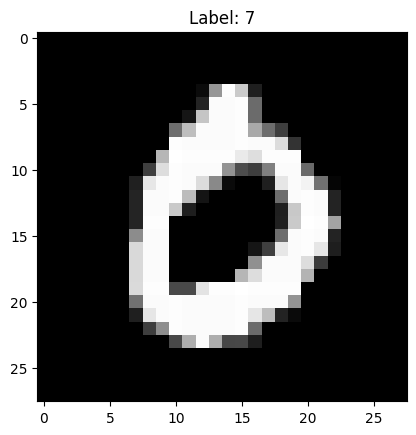

In [50]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch

transform = transforms.Compose([transforms.ToTensor()])
test_loader = torch.utils.data.DataLoader(datasets.MNIST('./train/data', train=False, transform=transform),
                                        batch_size=1000, shuffle=False)
# Extract a single image from the validation set
data_iter = iter(test_loader)
images, labels = next(data_iter)
image = images[3].numpy().squeeze()

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {labels[0].item()}')
plt.show()

In [51]:
image.shape

(28, 28)

In [52]:
from engine import *

mod = model("train/mnist_ffn_complex.onnx")

In [53]:
res = list(mod.infer(image).flatten())
print(res.index(max(res)))

0


In [2]:
import onnx

model = onnx.load("train/mnist_ffn_complex.onnx")

In [8]:
def traverse(obj):
    if isinstance(obj, dict):
        for key, value in obj.items():
            print(f'Key: {key}')
            traverse(value)
    elif isinstance(obj, list):
        for item in obj:
            traverse(item)
    else:
        print(f'Value: {obj}')


In [8]:
from engine import convert_raw_data
import numpy as np

with open("onnx.txt", "w+") as f:
    for n, i in enumerate(model.graph.initializer):
        data = convert_raw_data(i)
        f.write(f'{i.name} {data.shape}\n')

        # Flatten and reshape into (1, N) for a single line
        flat_data = data.flatten()[None, :]
        print(flat_data.shape)
        # Use newline='' to ensure no extra newlines are added by savetxt
        # We'll add our own newline after the call.
        np.savetxt(f, flat_data, fmt='%s', delimiter=' ', newline='')

        # Now add a single newline after all data is printed on one line
        f.write('\n')

        if n > 0:
            break


(1, 401408)
(1, 512)


In [2]:
#readlines from onnx.txt
with open("onnx.txt", "r") as f:
    lines = f.readlines()

lines[1][0:200]

'-0.03362275 0.021418475 -0.0073473323 0.018169425 0.004964892 -0.0043730065 0.009905748 0.00176185 0.013043866 -0.013917893 -0.0026038848 -0.0032152608 0.00518442 -0.00012344068 0.031222511 0.01111402'

In [10]:
traverse(model.graph)

Value: node {
  input: "onnx::Flatten_0"
  output: "/Flatten_output_0"
  name: "/Flatten"
  op_type: "Flatten"
  attribute {
    name: "axis"
    i: 1
    type: INT
  }
}
node {
  input: "/Flatten_output_0"
  input: "fc1.weight"
  input: "fc1.bias"
  output: "/fc1/Gemm_output_0"
  name: "/fc1/Gemm"
  op_type: "Gemm"
  attribute {
    name: "alpha"
    f: 1
    type: FLOAT
  }
  attribute {
    name: "beta"
    f: 1
    type: FLOAT
  }
  attribute {
    name: "transB"
    i: 1
    type: INT
  }
}
node {
  input: "/fc1/Gemm_output_0"
  output: "/Relu_output_0"
  name: "/Relu"
  op_type: "Relu"
}
node {
  input: "/Relu_output_0"
  input: "fc2_left.weight"
  input: "fc2_left.bias"
  output: "/fc2_left/Gemm_output_0"
  name: "/fc2_left/Gemm"
  op_type: "Gemm"
  attribute {
    name: "alpha"
    f: 1
    type: FLOAT
  }
  attribute {
    name: "beta"
    f: 1
    type: FLOAT
  }
  attribute {
    name: "transB"
    i: 1
    type: INT
  }
}
node {
  input: "/fc2_left/Gemm_output_0"
  output: 